In [20]:
import json
import os
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from gapminder import gapminder
import numpy as np
import pandas as pd

In [3]:
f = open('../report_generators/processed_data/packages/LENGTH/dim_x.json')
dataset_1 = json.loads(f.read())
f.close()

f = open('../report_generators/processed_data/packages/LENGTH/dim_y.json')
dataset_2 = json.loads(f.read())
f.close()

# f = open('../report_generators/processed_data/fixtures/LAYER/dim_x.json')
# dataset_1 = json.loads(f.read())
# f.close()

# f = open('../report_generators/processed_data/fixtures/LAYER/dim_y.json')
# dataset_2 = json.loads(f.read())
# f.close()



In [4]:
def isMonotonic(A):
 
    return (all(A[i] <= A[i + 1] for i in range(len(A) - 1)) or
            all(A[i] >= A[i + 1] for i in range(len(A) - 1)))
 
 
# Driver program
# A = [3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3]
 
# Print required result
print(isMonotonic(dataset_1) and isMonotonic(dataset_2))

False


In [5]:
# if isMonotonic(dataset_1) and isMonotonic(dataset_2):
corr, p_val = stats.kendalltau(dataset_1, dataset_2)
# print("use Spearman correlation")
# print ("P-Value: ", p_val)
# print(f'corr = {corr}')
# else:
# corr, p_val = stats.spearmanr(dataset_1, dataset_2)
print("use Pearson correlation")
print ("P-Value: ", p_val)
print(f'corr = {corr}')

use Pearson correlation
P-Value:  1.4640291116893367e-06
corr = -0.01087754972422706


max = 71 min = 6


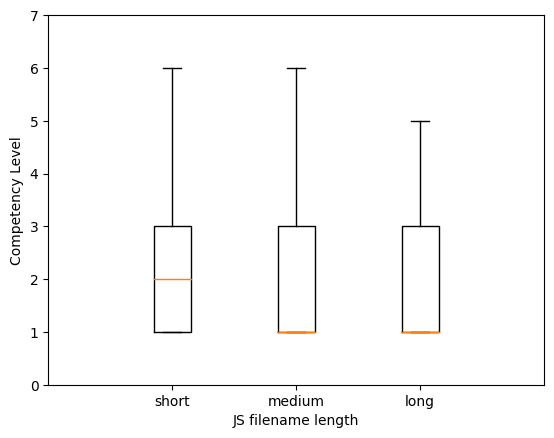

In [7]:
LENGTH = len(dataset_1)

print(f'max = {max(dataset_1)} min = {min(dataset_1)}')

arr = [[], [], []]

for i in range(LENGTH):
    x_val = dataset_1[i]
    y_val = dataset_2[i]
    if x_val < 20:
        arr[0].append(y_val)
    elif 20 <= x_val < 40:
        arr[1].append(y_val)
    elif 40 <= x_val < 60:
        arr[2].append(y_val)

bars = ['short', 'medium', 'long']

plt.axis([0, 4, 0, 7])
plt.xlabel('JS filename length')
plt.ylabel('Competency Level')

plt.boxplot(arr, labels=bars)
plt.show()

<AxesSubplot: >

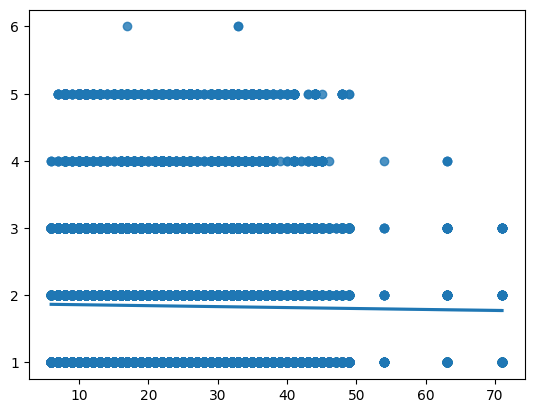

In [16]:
z = np.random.rand(40)

# plt.scatter(dataset_1, dataset_2, s=1000, alpha=0.5)
# plt.show()
sns.regplot(x=dataset_1, y=dataset_2)

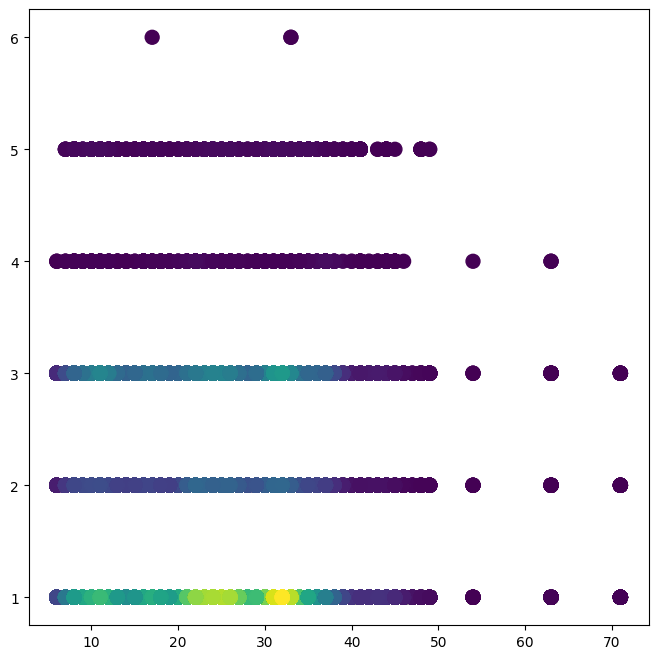

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x = dataset_1
y = dataset_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()


# df = pd.DataFrame({"length": x, "comp_lv": y})



# print(df)


 
# use the scatterplot function to build the bubble map
# sns.scatterplot(data=df, x="length", y="comp_lv", legend=False, sizes=(20, 2000))

# show the graph
# plt.show()